In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the CSv file and store it in train and test dataset.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#show shape for both the dataset.
( train.shape , test.shape )

((12980, 12), (4399, 11))

 As we can observe that the test data set had one less column awhich is the dependent variable and needed to find out.

In [4]:
#Elements inside the data set tain
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [5]:
#element inside test data set.
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [6]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [8]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Univarient analysis 

In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

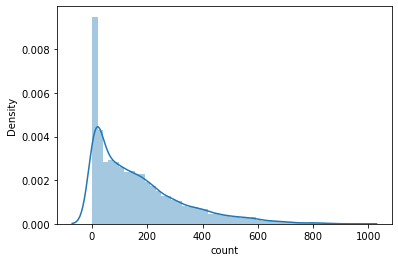

In [10]:
# plot show the count graph to get idea about the distributon of the data.
sns.distplot(train['count'])

As we can see the distribution of data is towards right so lets take square root transform or log function to standardise the data.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

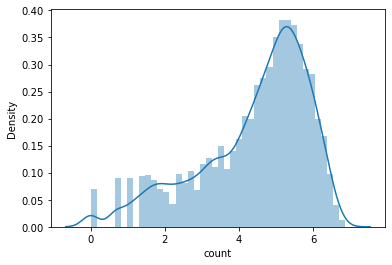

In [11]:
sns.distplot(np.log(train['count']))

Now we can see the graph its is little less skewd so lets go with log function 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

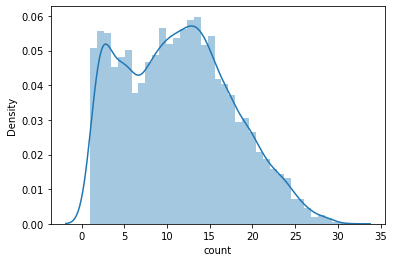

In [12]:
sns.distplot(np.sqrt(train['count']))

1. The Square root transform shows the daa is evenly distributed and this could also be considered. 
2. Now lets explore the variables to have a better understanding of the data provided.
3. First will explore the variables individually, then we will look at the relation between various independent variables and the target variable. 
4. We will also look at the correlation plot to see which variables affects the target variable most.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

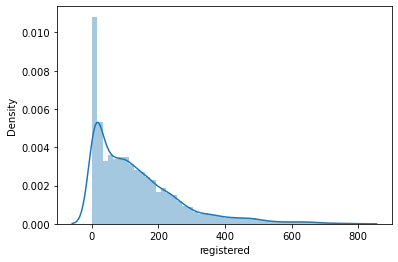

In [13]:
#lets check distribution for vehichle registration made by people.
sns.distplot(train['registered'])

As we can see from the graph the data is right skewed and it shows that the maximum registrations came from 0-300. the maximum registration is alwsys equal to the dimand of the vehicles at the perticular time.

This shows co relaton between thtwo registration and count (as demand for vehicles)

now lets do the BIvarient analysis and check corlation between different variables.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='casual', ylabel='Density'>

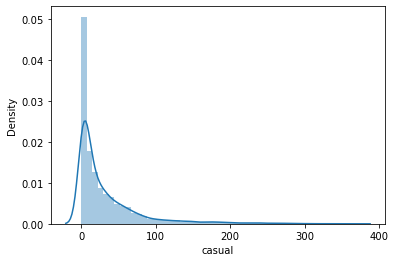

In [14]:
#check for casual users renting without registration.
sns.distplot(train['casual'])

It shows a steef rightwords skewness and the maxim number lies between 0-100. it shows most of the casual customer does not rent the bike and those who rent the bike are very less as compared to registerd customer.

# Bivarient Analysis

<AxesSubplot:>

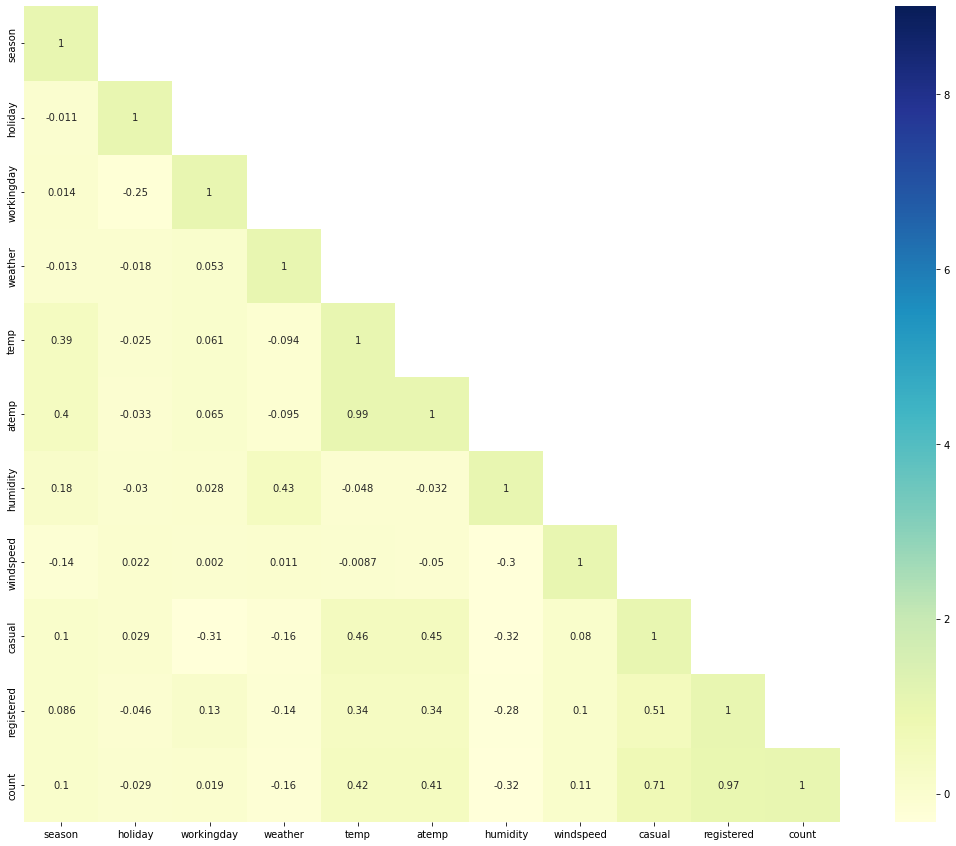

In [15]:
# lets find the correlation between the variables.
corr = train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax = plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap(corr, mask=mask, vmax=9, annot=True, square=True, cmap='YlGnBu')

### The above corellation chart shows.
1. the correlation between registerd user and count of booking is the most so we can say that 'registered' variable highly corelated to dependent variable.
2. casual is also correlated with registered and count.
3. temp and atemp are also positively correlated to count. and the interalation between temp and a temp is maximum near to 1. so me can drop 1 vaariable as they are highely corelated an we dont wa to increase the no of variable.
4. wind speed is not a useful feature and we can see it from the correlation table.
5. temp and humidity are positively and negatively related to the count.
6. weather is also negatively co related to the count variable.

Before going for the model building, lets check for the missing values.

In [16]:
#check the missing values in the dataset.
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

we can see that there are no missing values in the data set.

so now lets proceed for the model building and here we will split the date and time using datetime lib from pands.

In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [19]:
#lets proceed for the train dataset.
from datetime import date
from datetime import datetime

train['date'] = train.datetime.apply(lambda x : x.split()[0])
train['hour'] = train.datetime.apply(lambda x : x.split()[1].split(':')[0])
train['month'] = train.date.apply(lambda datestring : datetime.strptime(datestring, '%Y-%m-%d').month)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,2011-01-01,4,1


In [20]:
#follow same for the test dataset
test['date'] = test.datetime.apply(lambda x : x.split()[0])
test['hour'] = test.datetime.apply(lambda x : x.split()[1].split(':')[0])
test['month'] = test.date.apply(lambda datestring : datetime.strptime(datestring, '%Y-%m-%d').month)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,hour,month
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,2012-06-30,1,6
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2012-06-30,2,6
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,2012-06-30,3,6
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,2012-06-30,4,6
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,2012-06-30,5,6


Now as out data is ready lets devide the train set and chek the model performance in the set. for that we have to take 2 variables and split first 15 months into one and other 3 month for validating.


In [21]:
training =  train[train['datetime']<= '2012-03-30 0:00:00']
validation = train[train['datetime'] > '2012-03-30 0:00:00']
( training.shape , validation.shape )

((10774, 15), (2206, 15))

Now we will drop datetime, date , atemp
1. As we have seen high correlation between atem and temp.
2. As we have already extraced the desired values from datetime and date.

In [22]:
train = train.drop(['datetime','date','atemp'], axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date','atemp'], axis=1)
validation = validation.drop(['datetime','date','atemp'], axis=1)


In [23]:
training.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
0,1,0,0,1,9.84,81.0,0.0,3,13,16,0,1
1,1,0,0,1,9.02,80.0,0.0,8,32,40,1,1
2,1,0,0,1,9.02,80.0,0.0,5,27,32,2,1
3,1,0,0,1,9.84,75.0,0.0,3,10,13,3,1
4,1,0,0,1,9.84,75.0,0.0,0,1,1,4,1


In [24]:
training.shape

(10774, 12)

# Model Building

### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
#initialize the linear regression model as the dependent variable is a continous variable we will perform linear regression.
lmodel = LinearRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [27]:
x_train = training.drop('count', axis=1)
y_train = np.log(training['count'])
x_val = validation.drop('count', axis=1)
y_val = np.log(validation['count'])


In [28]:
#checking shpe for xtrain, ytrain , y val, and x val.
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [29]:
#fitting x_train and y_train in the model
lmodel.fit(x_train,y_train)

LinearRegression()

Now we have a trained linear regression model with us. We will now make prediction on the X_val set and check the performance of our model. Since the evaluation metric for this problem is RMSLE, we will define a model which will return the RMSLE score.

In [30]:
prediction = lmodel.predict(x_val)

In [31]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [32]:
rmsle(y_val,prediction)

0.887537920428181

In [33]:
test_prediction = lmodel.predict(test)
prediction_final= np.exp(test_prediction)
prediction_final

array([25.79972134, 26.22517998, 21.26634148, ..., 73.79927217,
       63.00372774, 59.2648812 ])

We have got root mean square logarithmic error for the given equation of 0.8875.
which translate to a accuricy of 88.75%

## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor


In [35]:
dt_regrs = DecisionTreeRegressor(max_depth=5)

In [36]:
#lets execute the decision tree. i.e. fit the model
dt_regrs.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [37]:
prediction_dt = dt_regrs.predict(x_val)

In [38]:
rmsle(y_val,prediction_dt)

0.17102267399447002

In [39]:
final_prediction = dt_regrs.predict(test)

In [40]:
final_prediction = np.exp(final_prediction)

In [41]:
final_prediction.shape, prediction_final.shape

((4399,), (4399,))

Now we will save save these prediction files to the csv file.

In [42]:
submit = pd.DataFrame()

In [43]:
submit['count'] = prediction_final #<-- this column stores the values predicted using the linear regression model on the test data set
submit['count1'] = final_prediction #<-- this column shows the values predicted using the decission treeregression model on the test dataset.

In [44]:
submit.to_csv('submission.csv', header=True, index=False)

In [45]:
final_df = pd.read_excel(f"solution_checker.xlsx")

In [66]:
final_df.iloc[:,:2]

,datetime,count
0,2012-06-30 1:00:00,25.799721
1,2012-06-30 2:00:00,26.225180
2,2012-06-30 3:00:00,21.266341
3,2012-06-30 4:00:00,21.106737
4,2012-06-30 5:00:00,21.590963
...,...,...
4394,2012-12-31 19:00:00,82.508344
4395,2012-12-31 20:00:00,70.784045
4396,2012-12-31 21:00:00,73.799272
4397,2012-12-31 22:00:00,63.003728


So the score generated for the output predicted by the linar regression model is 0.9388. Which come around 93.88% accurate prediction.


And count states the no of booking might come on the given date for the given time period.